<div style="text-align:center">
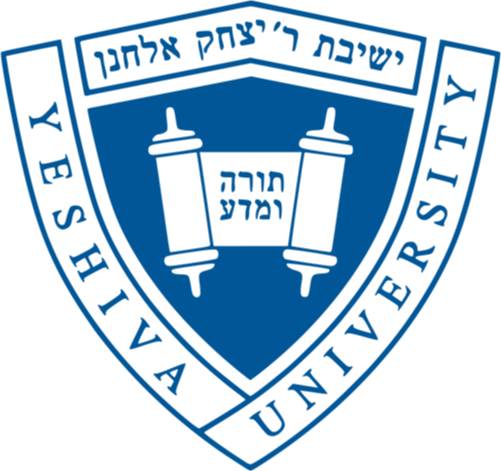
</div>

<br><br>
<h1 style='text-align: center;'>Katz School of Science and Health</h1>
<h1 style='text-align: center;'>AIM 5001 Data Acquisition & Management</h1>
<p>
<h2 style='text-align: center;'>Project 3</h1>
<h2 style='text-align: center;'>Data Preparation & Feature Engineering</h1>
<br><br>

<h3 style='text-align: center;'>Radek Jan Holik</h3>
<h3 style='text-align: center;'>Sheng-Han Yueh</h3>
<h3 style='text-align: center;'>Chi-Kuang Chen</h3>
<br>
<br>

In [296]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
import statsmodels.api as sm

# Shows All Columns of a Pandas DataFrame
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

__The data set contains the following variables.__

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

# **Loading data set**

### Read the data set from the Github repository

In [297]:
# The file path to the online AIM 5001 Github Repository with the "M10_Data.csv" file
filePath = r'https://raw.githubusercontent.com/rjholik/AIM-5001-Data-Acquisition-Management/main/Module%2010/M10_Data.csv'
data = pd.read_csv(filePath, header=None)

__Add column names in the data frame.__

In [298]:
col='''symboling
normalized-losses
make
fuel-type
aspiration
num-of-doors
body-style
drive-wheels
engine-location
wheel-base
length
width
height
curb-weight
engine-type
num-of-cylinders
engine-size
fuel-system
bore
stroke
compression-ratio
horsepower
peak-rpm
city-mpg
highway-mpg
price'''
col=col.split('\n')

In [299]:
data.columns = col

### Quick check of the dataset

In [300]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


# **Basic exploratory data analysis (EDA)**

In [301]:
print(f'There are {data.shape[0]} rows and {data.shape[1]} attributes in the data set.')

There are 205 rows and 26 attributes in the data set.


In [302]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

__There is no null value in the table since it used '?' to substitute null value__

In [303]:
data = data.replace({'?':np.nan}) # replace the ? into nan

In [304]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

__There are a lot of missing values in normalized-losses, mild losses in num-of-doors, bore, stroke, horsepower, peak-rpm, and price.__ 

In [305]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

__The data type did not match the information in the link and num-of-doors and num-of-cylinders are discrete numeric data that are represented by characters.__

### __Transfer the following variants to meet the description in the link.__

In [306]:
data[['normalized-losses','curb-weight','bore','stroke','horsepower','peak-rpm','price']] = data[['normalized-losses','curb-weight','bore','stroke','horsepower','peak-rpm','price']].astype(float)
data['symboling'] = data['symboling'].astype(object)
data['num-of-cylinders'].replace({'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12},inplace = True)
data['num-of-doors'].replace({'two':2,'four':4},inplace = True)

In [307]:
data.dtypes

symboling             object
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors         float64
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders       int64
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

__There are 17 numerical variants and 9 categorical variants.__

In [308]:
numeric_data = list(data.describe().columns)
category_data = list(set(data.columns)-set(numeric_data))

### Numeric data names

In [309]:
print(len(numeric_data))
print(numeric_data)

17
['normalized-losses', 'num-of-doors', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


### Categorical data names

In [310]:
print(len(category_data))
print(category_data)

9
['symboling', 'fuel-type', 'make', 'body-style', 'aspiration', 'engine-type', 'engine-location', 'fuel-system', 'drive-wheels']


### __There are no duplicated data.__

In [311]:
data[data.duplicated()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## __EDA of Numerical data__

### Summary Statistics

In [312]:
data.describe()

,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,164.000000,203.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,122.000000,3.123153,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,35.442168,0.994841,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,150.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


__From the table, we know there is a missing value in normalized-losses, num-of-doors, bore, stroke, horsepower, peak-rpm, and price. The quantile result is visualized with the box plots below. Price has the highest std.__

### Histograms & Boxplots for Numerical Attributes

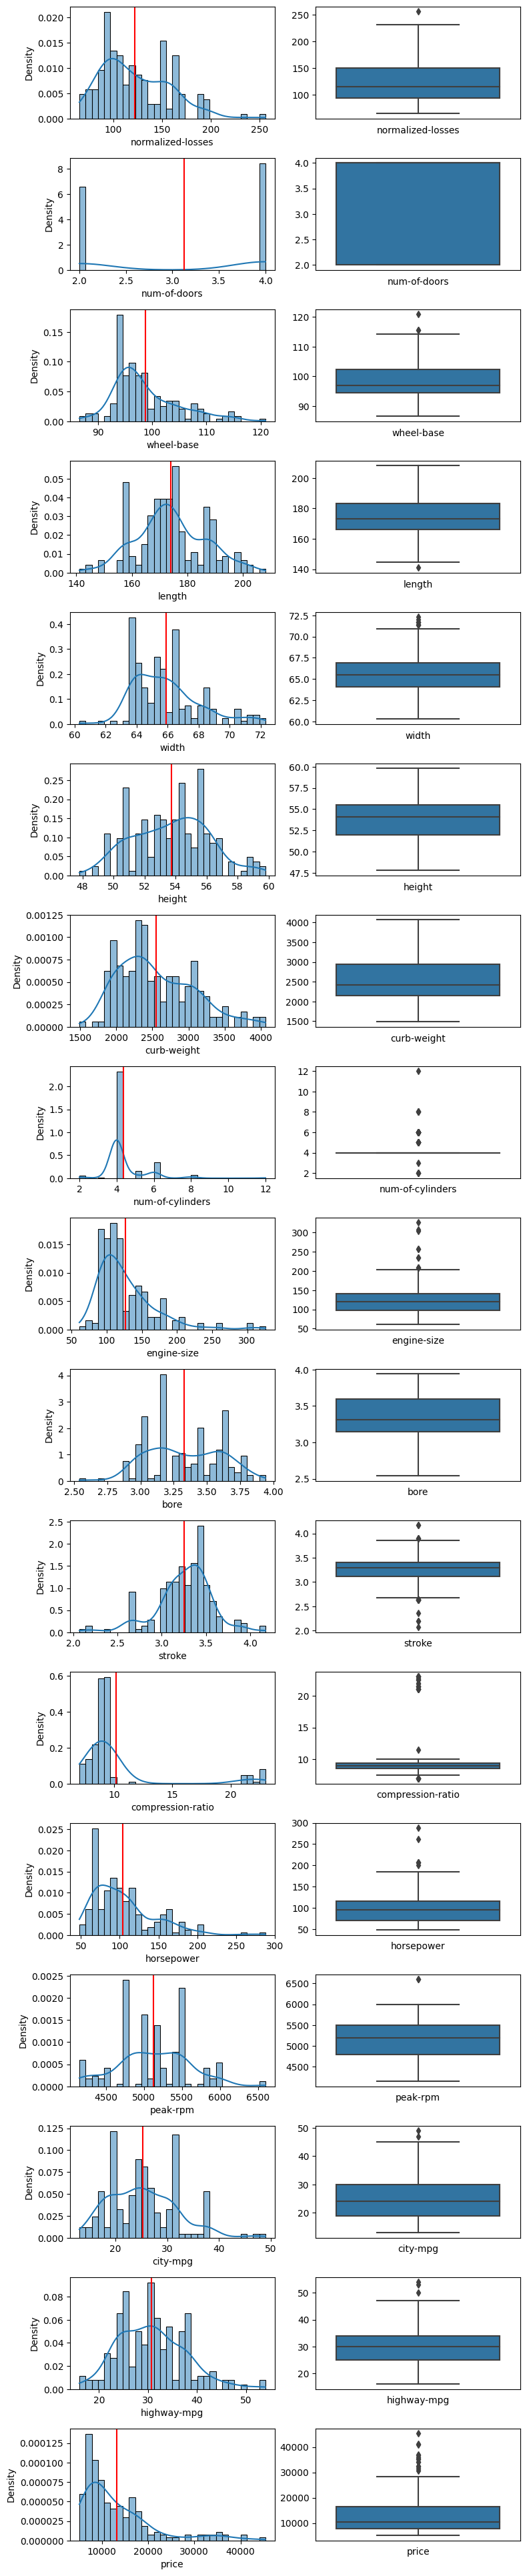

In [313]:
site=1
plt.figure(figsize=(10,20))
for i in numeric_data:
    plt.subplot(17,2,site)
    sns.histplot(data[i],bins=30,stat="density",kde=True)
    plt.axvline(x = data[i].mean(),color='red')
    site+=1
    
    plt.subplot(17,2,site)
    sns.boxplot(data[i])
    plt.xticks([])
    plt.xlabel(f'{i}')
    site+=1
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.8, 
                    top=2, 
                    wspace=0.2, 
                    hspace=0.35)

__Visualized distribution of each numerical variant:__
* Normalized distribution: length, width, height, bore, stroke, peak-rpm
* Left skewed distribution: normalized-losses, wheel-base, curb-weight, num-of-cylinders, engine-size, horsepower, city-mpg, highway-mpg, price
* distributed in two sides: num-of-doors, compression-ratio

Text(0.5, 1.0, 'Correlation Coefficient Of Numerical data')

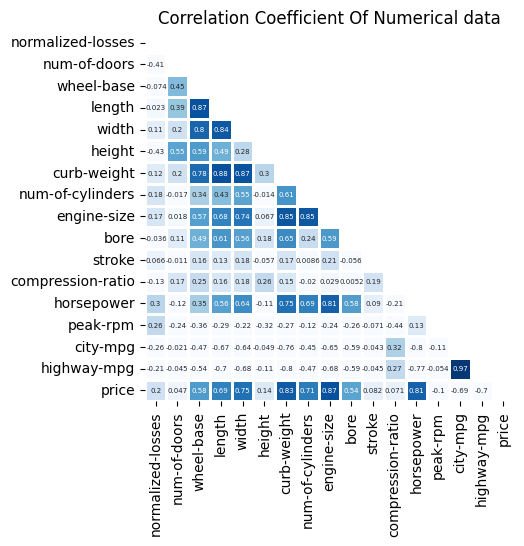

In [314]:
df_nu = data[numeric_data]
cor_data = df_nu.corr()
mask = np.triu(np.ones_like(df_nu.corr(), dtype=bool))
plt.figsize = (30,10)
ax = sns.heatmap(cor_data, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues',mask=mask,annot=True,annot_kws={"size":5})
plt.title('Correlation Coefficient Of Numerical data')

__The following variables have high positive linear correlation with each other:__
* length, width, curb-weight, wheel base
* length, width, curb-weight, engine-size
* hoursepower, curb-weight, num-of-cylinders, engine-size
* highway-mpg, city-mpg
* price, length, width, curb-weight, num-of-cylinders, engine-size, hoursepower

__The following variables have high negative linear correlation with each other:__
* city-mpg with length, width,hoursepower, curb-weight, and engine-size
* highway-mpg with length, width, hoursepower, curb-weight, and engine-size
* price with city-mpg and highway-mpg

## __EDA of Categorical Data__

### Frequency of unique values in individual categorical attributes

In [315]:
for i in category_data:
    print('col:' + i)
    print(data[i].value_counts())
    print('-------------')

col:symboling
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
-------------
col:fuel-type
gas       185
diesel     20
Name: fuel-type, dtype: int64
-------------
col:make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64
-------------
col:body-style
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
-------------
col:aspiration
std      168
turbo     37
Name: aspiration, dtype: int64
-------------
col:engine-type
ohc      148
ohcf      15
ohcv      13
dohc      12
l         

__The count number of each category is visualized in the following bar plot.__

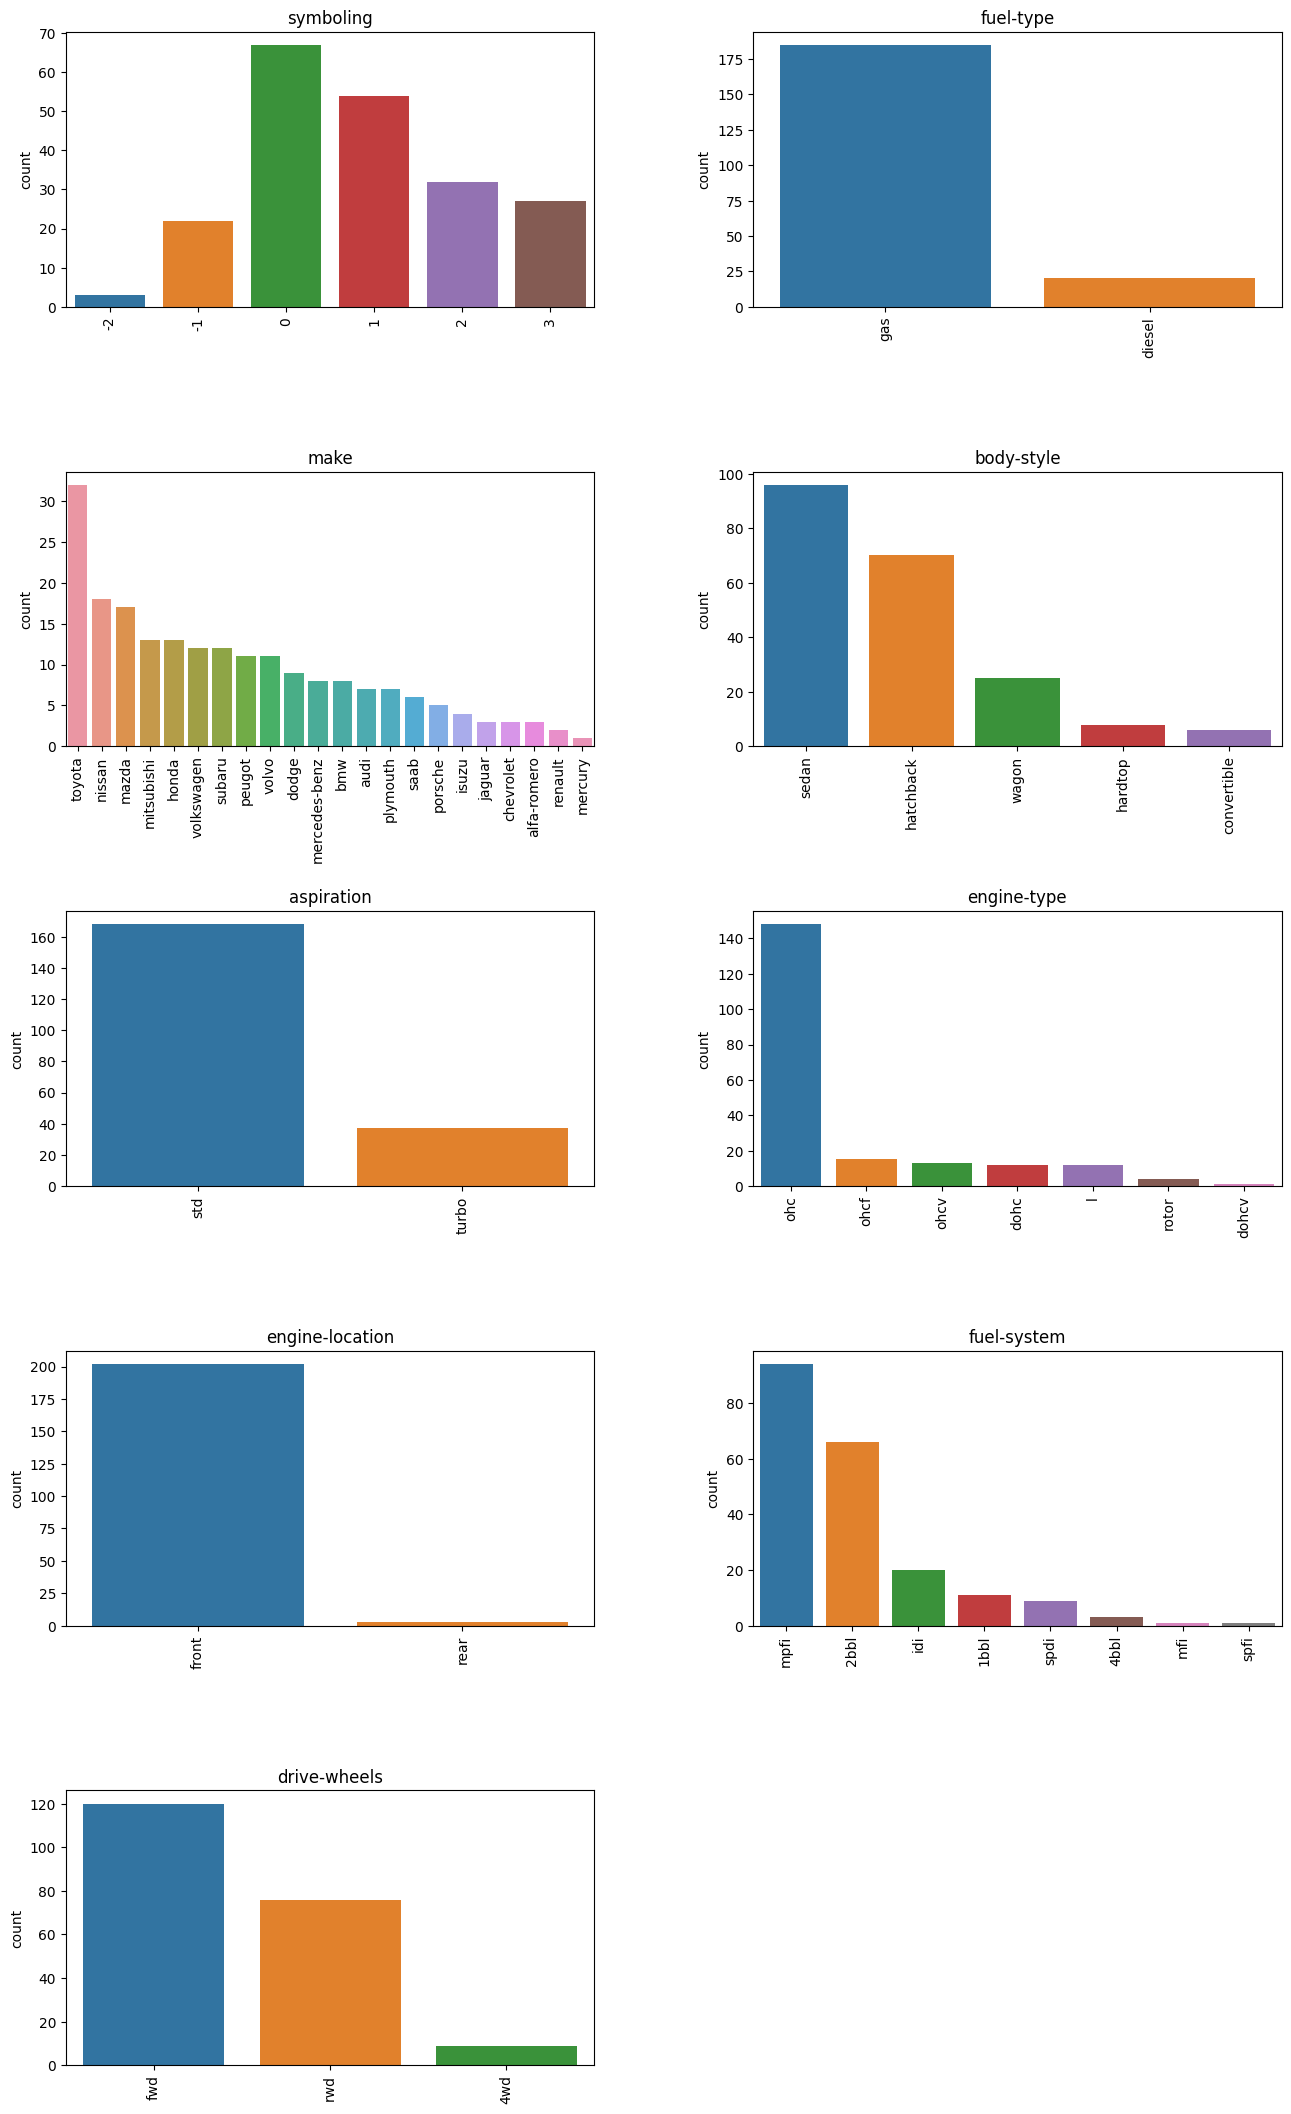

In [316]:
plt.figsize=(4,10)
for i in range(len(category_data)):
    plt.subplot(9,2,i+1)
    res=data[category_data[i]].value_counts().to_frame()
    #print(res)
    sns.barplot(data=res, x=res.index, y=res.iloc[:,0].tolist())
    plt.xticks(rotation=90)
    plt.title(f'{category_data[i]}')
    plt.ylabel('count')
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2.0, 
                    top=8, 
                    wspace=0.3, 
                    hspace=0.6)

__The characteristic in the following has most of the automobiles:__
* symboling: 0
* drive-wheels: fwd
* engine-type: ohc
* body-style: sedan
* make: toyota
* aspiration: std
* fuel-system: mpfi
* fuel-type: gass
* engine-location: front

__The following figures showed the price in each category__

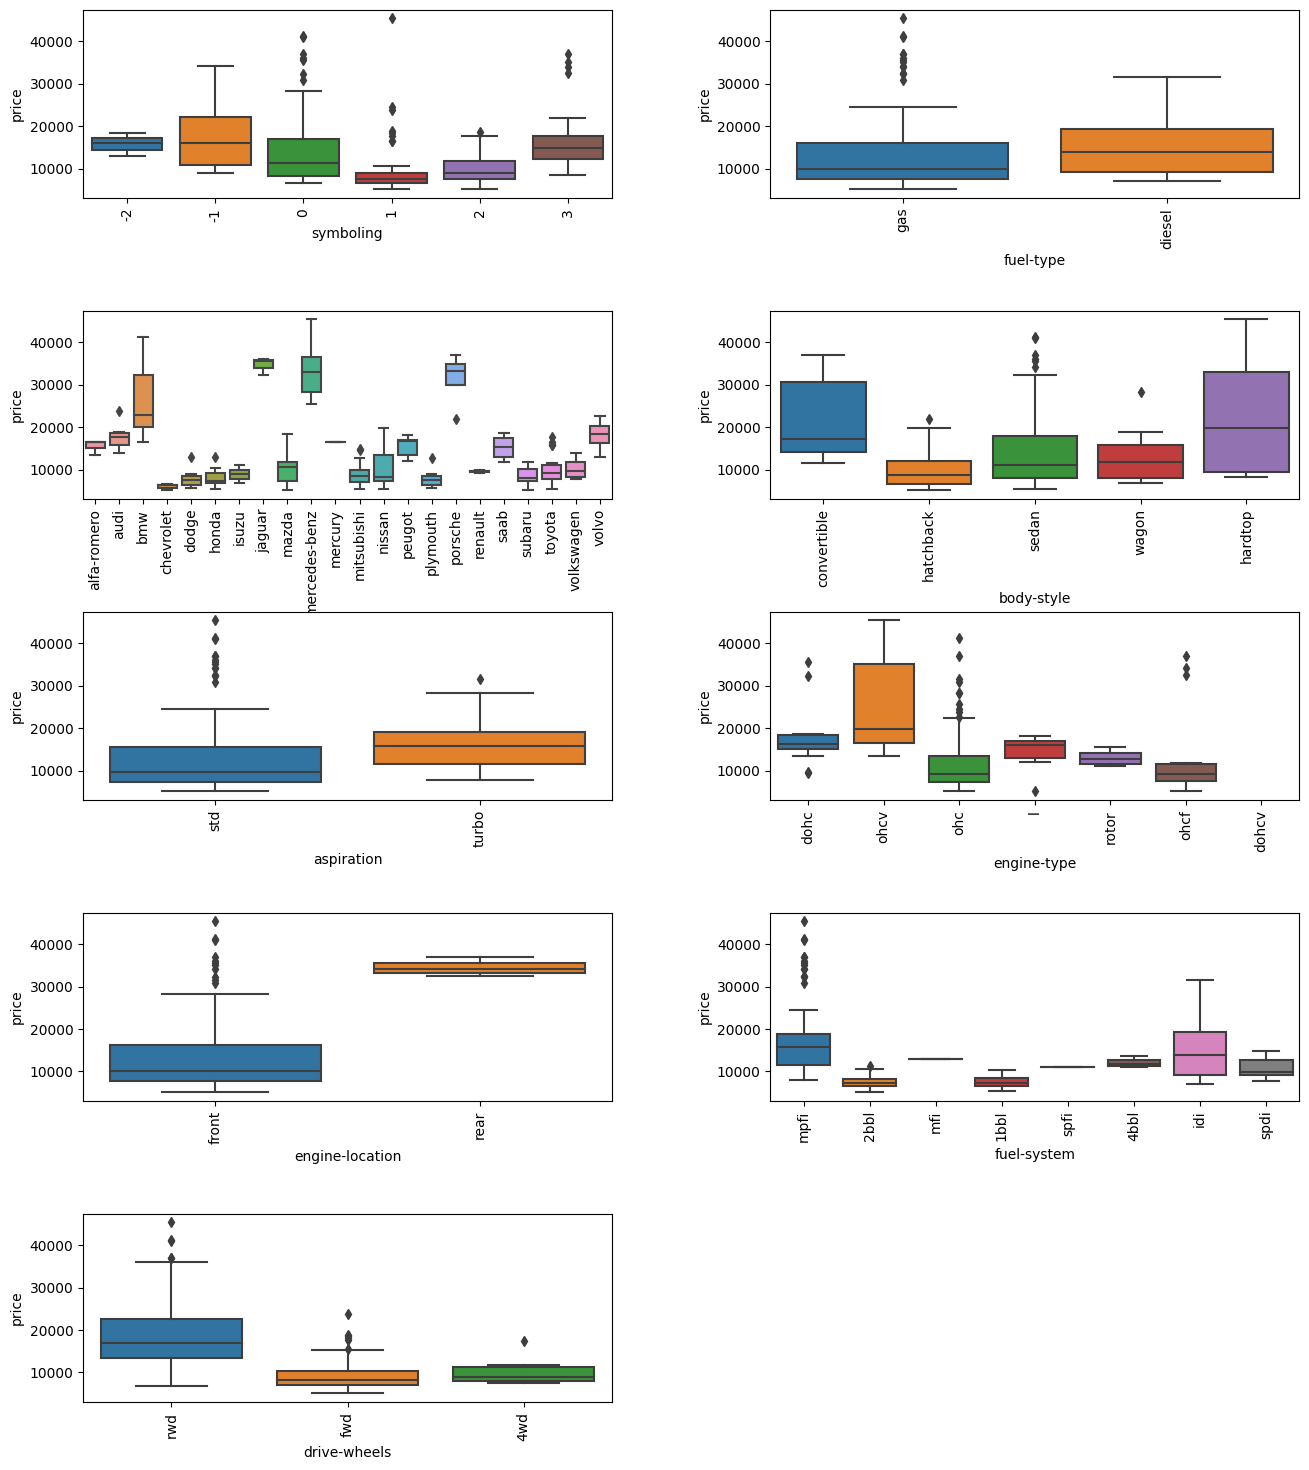

In [317]:
plt.figsize=(10,10)
for i in range(len(category_data)):
    plt.subplot(5,2,i+1)
    sns.boxplot(data=data,x=category_data[i],y='price')
    plt.xticks(rotation=90)
    plt.ylabel('price')
    

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2, 
                    top=3, 
                    wspace=0.3, 
                    hspace=0.6)

__Categorical data EDA:__
* All the categorical features vary in price. For the features of engine location, fuel-type, and aspiration, they have lower prices when the feature is uncommon. The car made by juguar, the drive-wheels is rwd, the body-style is hardtop, engine-type is ohcv, and the fuel-system is mpfi have the highest median price. 

# **Data Preparation & Feature Engineering**

# **Task #1:**
**(10 Points)**
Which numeric variables contained within the data set appear to require the use of a feature scaling method for purposes of preparing them for use within a machine learning algorithm? Be sure to list each relevant variable and explain why you believe each variable that you’ve identified requires the use of some sort of feature scaling method.

#### Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. 

The necessity of this step depends on the characteristics of the data features. If there are >= 2 features, and the value range of different features varies greatly, it is necessary to use Feature scaling. Different units will lead to different calculation results. Features with large scales will play a decisive role, while features with small scales may be ignored. In order to eliminate the influence of differences in units and scales between features, each dimension feature is treated equally. Features need to be normalized.

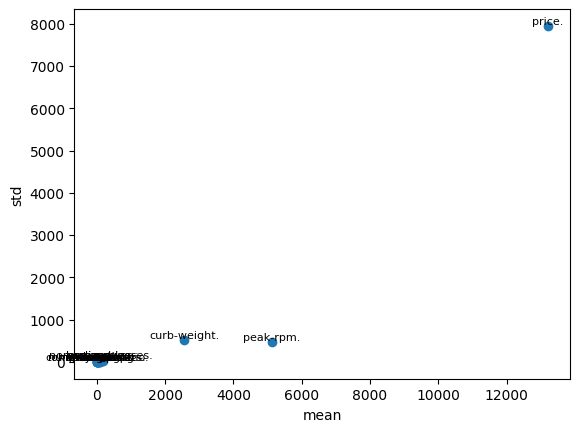

In [318]:
data_des = data.describe()
mean = data_des.iloc[1]
std = data_des.iloc[2]
name = data_des.columns.values.tolist()

x, y = mean, std
label = name


plt.figsize=(12,20)
plt.scatter(x, y)
plt.xlabel('mean'); plt.ylabel('std')
for a, b, l in zip(x,y,label): 
    plt.text(a, b+0.1, '%s.' % l, ha='center', va='bottom', fontsize=8)

#### Interpretarion:

According to the textbook, "Feature Engineering for Machine Learning": Feature scaling is typically performed individually for each feature. As we have already performed the data describe function, we are able to observe the mean and standard deviation for each number variable. As shown in the scatter plot above, x represents the mean and y represents the standard deviation. There are a few attributes that can be distinguished from the variable clusters by the fact that they are isolated. 

The following are easily identifiable from the scatter plot:

1. curb-weight
2. peak-rpm
3. price

We suggest to use min-max normalization to converge the difference between outlining attibutes and cluster.

# **Task #2:**
**(15 Points)**
Consider the **number-of-doors** and **price** variables: Based on your EDA work, how many missing data values occur within each of these attributes? As we’ve learned, missing data values can impede the proper functioning of many machine learning algorithms. To address the missing the **number-of-doors** and **price** values, you have been instructed to formulate what you believe will be an effective data imputation approach for purposes of estimating reasonable proxies for the missing data values. Your supervisor tells you that the affected data observations **MUST** be retained within the data set, and that it would be inappropriate to use either a mean, median, or mode value for any of the missing values since doing so would increase the likelihood of introducing unwarranted bias within the data set. Describe the imputation method you would employ for each variable. Then, using your Python skills, apply your prescribed imputation methods to the variables. Be sure to include graphics and commentary that explain your approach as well as the results of your efforts.

In [319]:
# To understand the missing value of num-of-doors, selecting the rows with missing num-of-doors value

data.loc[data['num-of-doors'].isnull() == True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191.0,ohc,4,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443.0,ohc,4,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [320]:
data.loc[(data['body-style'] == 'sedan') & (data['make'] == 'dodge')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
25,1,148.0,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,50.6,1989.0,ohc,4,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,6692.0
26,1,148.0,dodge,gas,std,4.0,sedan,fwd,front,93.7,157.3,63.8,50.6,1989.0,ohc,4,90,2bbl,2.97,3.23,9.4,68.0,5500.0,31,38,7609.0
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,157.3,63.8,50.6,2191.0,ohc,4,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0


In [321]:
data.loc[(data['body-style'] == 'sedan') & (data['make'] == 'mazda')]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
53,1,113.0,mazda,gas,std,4.0,sedan,fwd,front,93.1,166.8,64.2,54.1,1945.0,ohc,4,91,2bbl,3.03,3.15,9.0,68.0,5000.0,31,38,6695.0
54,1,113.0,mazda,gas,std,4.0,sedan,fwd,front,93.1,166.8,64.2,54.1,1950.0,ohc,4,91,2bbl,3.08,3.15,9.0,68.0,5000.0,31,38,7395.0
60,0,115.0,mazda,gas,std,4.0,sedan,fwd,front,98.8,177.8,66.5,55.5,2410.0,ohc,4,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,8495.0
62,0,115.0,mazda,gas,std,4.0,sedan,fwd,front,98.8,177.8,66.5,55.5,2410.0,ohc,4,122,2bbl,3.39,3.39,8.6,84.0,4800.0,26,32,10245.0
63,0,NaN,mazda,diesel,std,NaN,sedan,fwd,front,98.8,177.8,66.5,55.5,2443.0,ohc,4,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0
65,0,118.0,mazda,gas,std,4.0,sedan,rwd,front,104.9,175.0,66.1,54.4,2670.0,ohc,4,140,mpfi,3.76,3.16,8.0,120.0,5000.0,19,27,18280.0
66,0,NaN,mazda,diesel,std,4.0,sedan,rwd,front,104.9,175.0,66.1,54.4,2700.0,ohc,4,134,idi,3.43,3.64,22.0,72.0,4200.0,31,39,18344.0


#### To understand the missing value characteristics: we choose two most relevant attributes - heights and length to build the diagram.

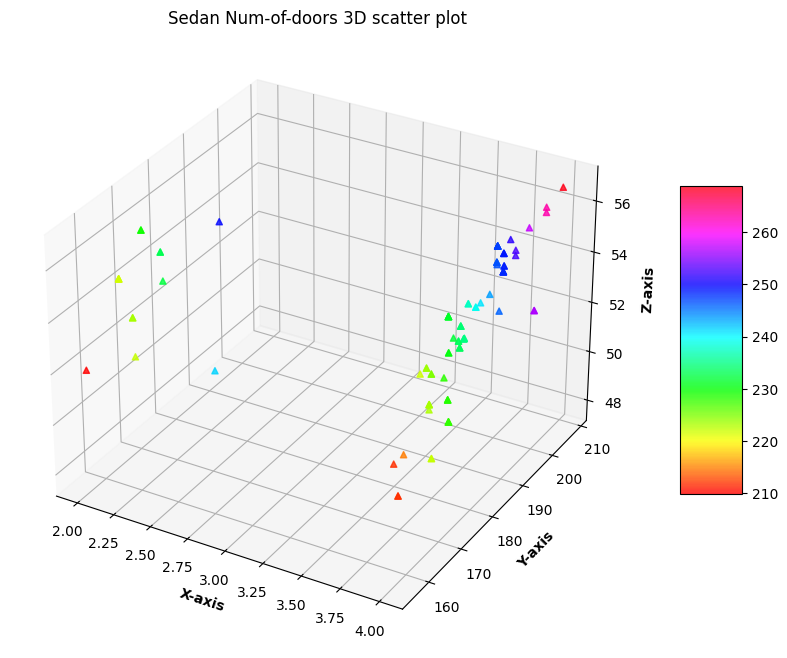

In [322]:
# Creating dataset
z = data.loc[(data['body-style'] == 'sedan')]['height']
x = data.loc[(data['body-style'] == 'sedan')]['num-of-doors']
y = data.loc[(data['body-style'] == 'sedan')]['length']
 
# Creating figure
fig = plt.figure(figsize = (14, 8))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 
 
# Creating color map
my_cmap = plt.get_cmap('hsv')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = (x + y + z),
                    cmap = my_cmap,
                    marker ='^')
 
plt.title("Sedan Num-of-doors 3D scatter plot")
ax.set_xlabel('X-axis', fontweight ='bold')
ax.set_ylabel('Y-axis', fontweight ='bold')
ax.set_zlabel('Z-axis', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
 
# show plot
plt.show()

# Source: https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/

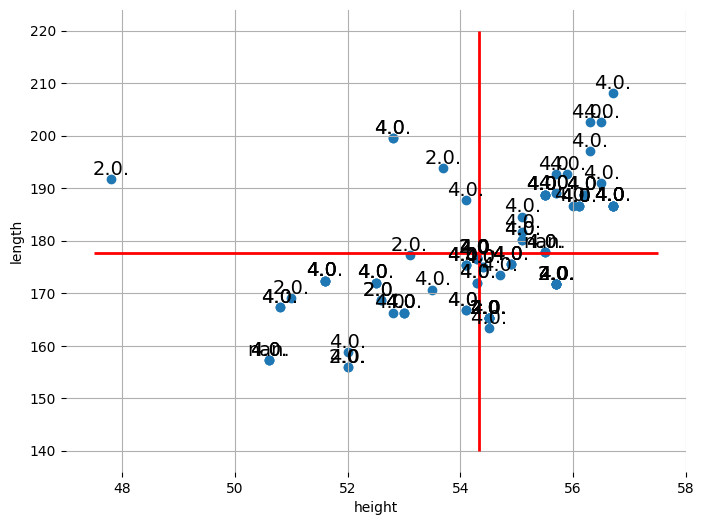

In [323]:
z = data.loc[(data['body-style'] == 'sedan')]['height']
x = data.loc[(data['body-style'] == 'sedan')]['num-of-doors']
y = data.loc[(data['body-style'] == 'sedan')]['length']


plt.figure(figsize=(8, 6))

x, y = data.loc[(data['body-style'] == 'sedan')]['height'], data.loc[(data['body-style'] == 'sedan')]['length']
label = data.loc[(data['body-style'] == 'sedan')]['num-of-doors']
plt.scatter(x, y)
plt.xlabel('height'); plt.ylabel('length')

for a,b,l in zip(x,y,label): 
    plt.text(a, b+0.1, '%s.' % l, ha='center', va='bottom', 
                                             fontsize=14)


plt.vlines(x=data.loc[(data['body-style'] == 'sedan')]['height'].mean(), ymin=140, ymax=220, 
           colors='red', linewidth=2)
plt.hlines(y=data.loc[(data['body-style'] == 'sedan')]['length'].mean(), xmin=47.5, xmax=57.5,
           colors='red', linewidth=2)

plt.grid(True)
#
sns.despine(trim=True, left=True, bottom=True)

In [324]:
# merge the dummy variables with the original data: note that
# the original "key" column can optionally be removed as was done here
# but if you have sufficient memory to work with it is usually
# advisable to retain the original column for reference purposes.
# 
# Also note that a prefix of "key" is being appended to each of the 
# valid values taken from the "key" column for purposes of applying a 
# meaningful name to the dummy variable columns

dummies_body = pd.get_dummies(data['body-style'], prefix='body')
dummies_doors = pd.get_dummies(data['num-of-doors'], prefix='door')
df_with_dummy_sedan = data
df_with_dummy_sedan['body_sedan'] = (dummies_body[['body_sedan']])
df_with_dummy_sedan['door_4.0'] = (dummies_doors[['door_4.0']])
df_with_dummy_sedan

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,body_sedan,door_4.0
0,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,0
1,3,NaN,alfa-romero,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,0
2,1,NaN,alfa-romero,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,0
3,2,164.0,audi,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,1,1
4,2,164.0,audi,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,2952.0,ohc,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,1,1
201,-1,95.0,volvo,gas,turbo,4.0,sedan,rwd,front,109.1,188.8,68.8,55.5,3049.0,ohc,4,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,1,1
202,-1,95.0,volvo,gas,std,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3012.0,ohcv,6,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,1,1
203,-1,95.0,volvo,diesel,turbo,4.0,sedan,rwd,front,109.1,188.8,68.9,55.5,3217.0,ohc,6,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,1,1


In [325]:
# Dependent Variable: door_4.0
# Indenpendent Variables: 'body_sedan', 'height', 'length'

Y = df_with_dummy_sedan['door_4.0']
X = df_with_dummy_sedan[['body_sedan', 'height', 'length']]
X = sm.add_constant(X)
ks = sm.OLS(Y, X)
ks_res =ks.fit()
ks_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               door_4.0   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     55.22
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           4.45e-26
Time:                        22:04:25   Log-Likelihood:                -85.873
No. Observations:                 205   AIC:                             179.7
Df Residuals:                     201   BIC:                             193.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7449      0.596     -7.959      0.000      -5.920      -3.569
body_sedan     0.3813      0.054      7.007      0.000       0.274       0.489
height         0.0835      0.012      6.779      0.000       0.059       0.108
length         0.0037      0.002      1.489      0.138      -0.001       0.009
==============================================================================
Omnibus:                        1.960   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.632
Skew:                          -0.204   Prob(JB):                        0.442
Kurtosis:                       3.155   Cond. No.                     4.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [326]:
df_missing_doors = df_with_dummy_sedan.loc[df_with_dummy_sedan['num-of-doors'].isnull() == True]
for i in range(len(df_missing_doors)):
    print(df_missing_doors.iloc[i]['num-of-doors'])

nan
nan


In [327]:
X_test = []
for i in range(len(df_missing_doors)):
    X_test.append(np.array([1, df_missing_doors.iloc[i]['body_sedan'], df_missing_doors.iloc[i]['height'] , df_missing_doors.iloc[i]['length']]))  # "1" refers to the intercept term
res_doors = ks_res.get_prediction(X_test).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval
res_doors

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0.436598,0.062843,0.312683,0.560513,-0.306356,1.179552
1,0.920742,0.040447,0.840988,1.000496,0.183866,1.657618


In [328]:
# Lookup for the missing value of num-of-doors index in order using index to update the value

index_missing = []
for i in range(len(data.loc[data['num-of-doors'].isnull() == True])):
    index_missing.append(data.loc[data['num-of-doors'].isnull() == True].index[i])
    
index_missing

[27, 63]

In [329]:
# Append the num_of_doors results to the res_doors module

num_of_doors = []

pd.options.mode.chained_assignment = None

for i in range(len(res_doors)):
    if res_doors.iloc[i]['mean'] >= 0.5:
        num_of_doors.append(4)
    else:
        num_of_doors.append(2)
        
res_doors['num_of_doors'] = num_of_doors
res_doors

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,num_of_doors
0,0.436598,0.062843,0.312683,0.560513,-0.306356,1.179552,2
1,0.920742,0.040447,0.840988,1.000496,0.183866,1.657618,4


In [330]:
# Replace the missing value of num-of-doors by regressional results

for i in range(len(index_missing)):
    data.at[index_missing[i],'num-of-doors']=(res_doors.iloc[i]['num_of_doors'])

# Succssfully updated the value    

data.loc[data['num-of-doors'].isnull() == True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,body_sedan,door_4.0


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


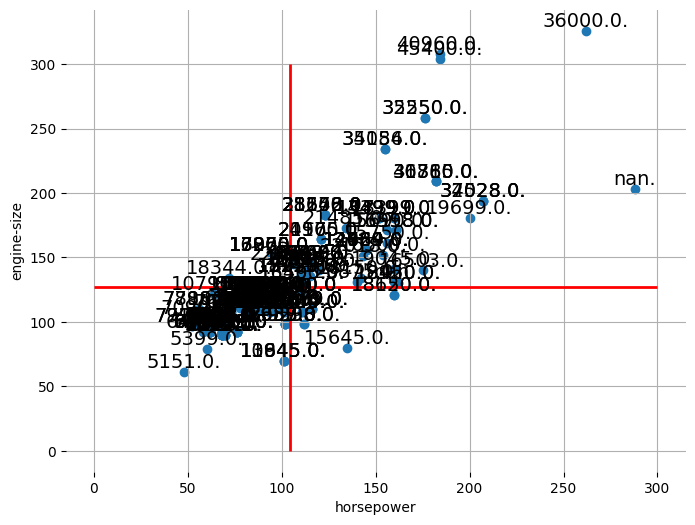

In [331]:
# To understand the missing value of price, showing the important attibutes to price determining by correlation

z = data['price']
x = data['horsepower']
y = data['engine-size']


plt.figure(figsize=(8, 6))

x, y = data['horsepower'], data['engine-size']
label = data['price']
plt.scatter(x, y)
plt.xlabel('horsepower'); plt.ylabel('engine-size')

for a,b,l in zip(x,y,label): 
    plt.text(a, b+0.1, '%s.' % l, ha='center', va='bottom', 
                                             fontsize=14)

plt.vlines(x=data['horsepower'].mean(), ymin=0, ymax=300, 
           colors='red', linewidth=2)
plt.hlines(y=data['engine-size'].mean(), xmin=0, xmax=300,
           colors='red', linewidth=2)


plt.grid(True)
#
sns.despine(trim=True, left=True, bottom=True)

In [332]:
# Dependent Variable: price
# Indenpendent Variables: 'horsepower','engine-size'

# Remove na - so no na would impact regression result
data2 = data.dropna(subset=['horsepower', 'price'])


Y = data2['price']
X = data2[['horsepower','engine-size']]
X = sm.add_constant(X)
ks2 = sm.OLS(Y, X)
ks_res2 =ks2.fit()
ks_res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     367.8
Date:                Sun, 06 Nov 2022   Prob (F-statistic):           4.49e-67
Time:                        22:04:26   Log-Likelihood:                -1914.7
No. Observations:                 199   AIC:                             3835.
Df Residuals:                     196   BIC:                             3845.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -8510.4652    843.842    -10.085      0.000   -1.02e+04   -6846.289
horsepower     60.2088     12.245      4.917      0.000      36.061      84.357
engine-size   122.4411     11.013     11.118      0.000     100.722     144.161
==============================================================================
Omnibus:                        9.476   Durbin-Watson:                   0.744
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               14.761
Skew:                           0.255   Prob(JB):                     0.000623
Kurtosis:                       4.233   Cond. No.                         557.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [333]:
df_missing_price = data.loc[data['price'].isnull() == True]
df_missing_price

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,body_sedan,door_4.0
9,0,NaN,audi,gas,turbo,2.0,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053.0,ohc,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN,0,0
44,1,NaN,isuzu,gas,std,2.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1874.0,ohc,4,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN,1,0
45,0,NaN,isuzu,gas,std,4.0,sedan,fwd,front,94.5,155.9,63.6,52.0,1909.0,ohc,4,90,2bbl,3.03,3.11,9.6,70.0,5400.0,38,43,NaN,1,1
129,1,NaN,porsche,gas,std,2.0,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366.0,dohcv,8,203,mpfi,3.94,3.11,10.0,288.0,5750.0,17,28,NaN,0,0


In [334]:
X_test2 = []
for i in range(len(df_missing_price)):
    X_test2.append(np.array([1, data.iloc[i]['horsepower'], data.iloc[i]['engine-size']]))  # "1" refers to the intercept term
res_price = ks_res2.get_prediction(X_test2).summary_frame(alpha=0.05)  # alpha = significance level for confidence interval
res_price

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,14090.059032,269.288346,13558.984386,14621.133679,6816.815991,21363.302074
1,14090.059032,269.288346,13558.984386,14621.133679,6816.815991,21363.302074
2,19372.743283,496.085302,18394.393009,20351.093558,12053.235559,26692.251007
3,10976.916359,318.253015,10349.276469,11604.556249,3695.985382,18257.847336


In [335]:
# Lookup for the missing value of price index in order using index to update the value

index_missing2 = []
for i in range(len(data.loc[data['price'].isnull() == True])):
    index_missing2.append(data.loc[data['price'].isnull() == True].index[i])
    
index_missing2

[9, 44, 45, 129]

In [336]:
# Append the num_of_doors results to the res_price module

price = []

pd.options.mode.chained_assignment = None

for i in range(len(res_price)):
    price.append(res_price.iloc[i]['mean'] )
        
res_price['price'] = price
res_price

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper,price
0,14090.059032,269.288346,13558.984386,14621.133679,6816.815991,21363.302074,14090.059032
1,14090.059032,269.288346,13558.984386,14621.133679,6816.815991,21363.302074,14090.059032
2,19372.743283,496.085302,18394.393009,20351.093558,12053.235559,26692.251007,19372.743283
3,10976.916359,318.253015,10349.276469,11604.556249,3695.985382,18257.847336,10976.916359


In [337]:
# Replace the missing value of price by regressional results

for i in range(len(index_missing2)):
    data.at[index_missing2[i],'price']=(res_price.iloc[i]['price'])

# Succssfully updated the value    

data.loc[data['price'].isnull() == True]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,body_sedan,door_4.0


# **Task #3:**
**(15 Points)**
Consider the **engine-size** and **stroke** variables: Describe the specific feature scaling method you would apply to each of them. Then, using Python, generate both a histogram and a boxplot for the original content of these two variables. Next, apply your prescribed feature scaling methods to the two variables and create histograms and boxplots that show the results of your feature scaling efforts. Compare your newly created plots against the plots you created for the original content of the variables. Comment on whether your feature scaling efforts improved the distribution of the data. If your feature scaling efforts did not improve the distribution of the data, explain why you believe your efforts were not effective.

__The original data distributions and box plots__

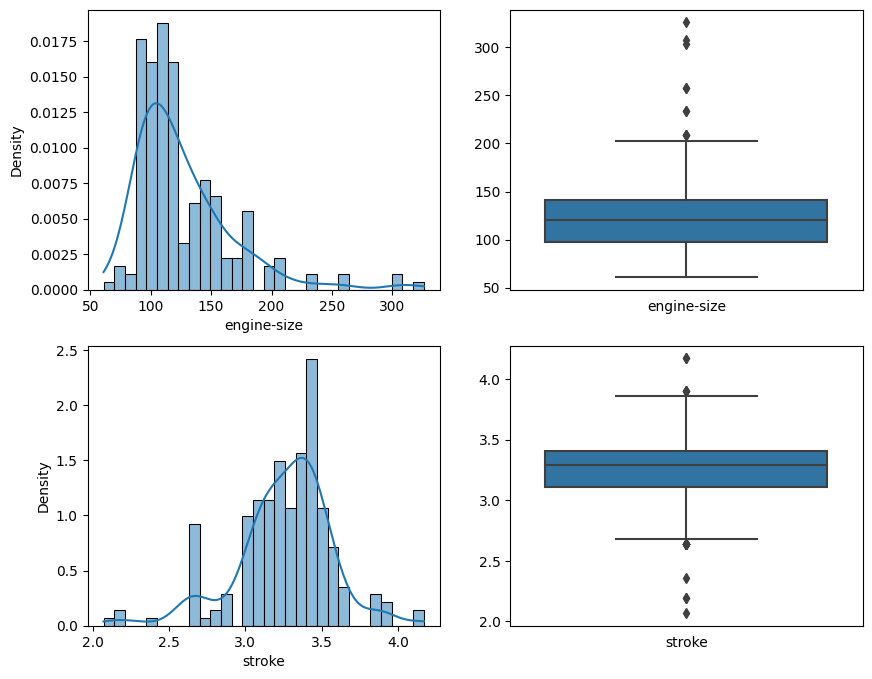

In [338]:
site=1
consider=['engine-size','stroke']
plt.figure(figsize=(10,8))
for i in consider:
    plt.subplot(2,2,site)
    sns.histplot(data[i],bins=30,stat="density",kde=True)
    site+=1
    
    plt.subplot(2,2,site)
    sns.boxplot(data[i])
    plt.xticks([])
    plt.xlabel(f'{i}')
    site+=1

__From the above figures, engine-size is left skewed distribution and stroke is nearly normalized. Therefore, we used Box-Cox method to transform engine-size data and used standardization to transform stroke data.__

In [339]:
def standardize(df):
    res=(df-df.mean())/(df.std())
    return res

In [340]:
data['scale_stroke']=standardize(data['stroke'])

data['scale_engine-size']=stats.boxcox(data['engine-size'])[0]

__Plot the figures again__

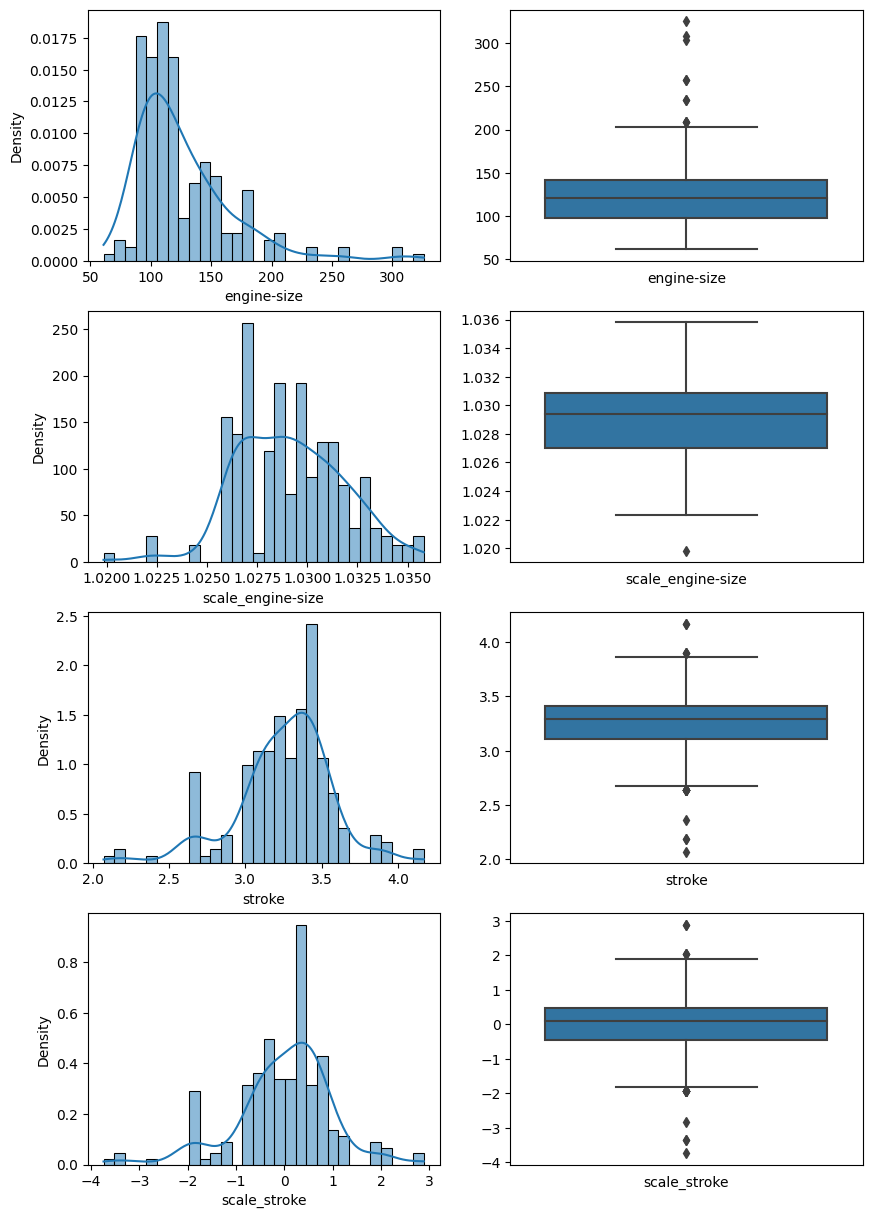

In [341]:
site=1
consider=['engine-size','scale_engine-size','stroke','scale_stroke']
plt.figure(figsize=(10,15))
for i in consider:
    plt.subplot(4,2,site)
    sns.histplot(data[i],bins=30,stat="density",kde=True)
    site+=1
    
    plt.subplot(4,2,site)
    sns.boxplot(data[i])
    plt.xticks([])
    plt.xlabel(f'{i}')
    site+=1

__The Box-cox method greatly improves the distribution of engine-size, however, standardization method did not alter the distribution of stroke. Standardization can be seen as a process that transfers data to how many sigmas the data away from the sample mean. Therefore, it should not change the p.d.f.__

# **Task #4:**
**(15 Points)**
Consider the **symboling**, **make**, and **engine-type** variables:

### **A) For each variable, specify whether its content is numeric/continuous, numeric/discrete, categorical/nominal, or categorical/ordinal**

#### **'symboling'** variable

In [342]:
# Unique values in 'symboling' Attribute
print(data['symboling'].unique())

[3 1 2 0 -1 -2]


#### __This attribute can take on the follwing values [-3, -2, -1, 0, 1, 2, 3]. This value is assigned for insurance risk rating, where a value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. For these properties, this attribute can naturally be considered a categorical ordinal variable.__

#### **'make'** variable

In [343]:
# Unique values in 'symboling' Attribute
print(data['make'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


#### __This attribute contains the name of the car manufacturer, i.e. it is a categorical nominal variable.__

#### **'engine-type'** variable

In [344]:
# Unique values in 'engine-type' Attribute
print(data['engine-type'].unique())

['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


#### __This is an attribute that stores information about the engine type, for example DOHC : Double Overhead Cam or OHV : Over Head Valve. It is a categorical nominal variable.__

### **B) For each variable, describe the methodology you would employ for purposes of preparing its data values for use within a machine learning algorithm.**

#### **'symboling'** variable

Since 'symboling' is a categorical ordinal variable, so-called dummy variables (new columns) must be created. These variables can be logical 1 (True - the categorical value is present in the use case) or 0 (False - the categorical value is not present in the use case). One dummy variable is needed for each nominal categorical attribute value.

#### **'make'** variable

The same approach is used as in the previous case. The 'make' attribute is a categorical ordinal variable, so-called dummy variables must be created.

#### **'engine-type'** variable

This is a categorical nominal variable. The dummy variables are needed for each nominal categorical attribute value.

### **C) Using your Python skills, apply your prescribed data preparation methodologies to the three variables. Be sure to show a sample of your results within you Jupyter Notebook.**

In [345]:
# Variables for each possible value of 'symboling'
dummies_symboling = pd.get_dummies(data['symboling'], prefix='symboling')
dummies_symboling.head()

,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,1,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [346]:
# Variables for each possible value of 'make'
dummies_make = pd.get_dummies(data['make'], prefix='make')
dummies_make.head()

,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [347]:
# Variables for each possible value of 'engine-type'
dummies_engine_type = pd.get_dummies(data['engine-type'], prefix='engine-type')
dummies_engine_type.head()

,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [348]:
# merge all the dummy variables with the original data
df_with_dummy = data[['normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'scale_stroke', 'scale_engine-size']].join([dummies_symboling, dummies_make, dummies_engine_type])

In [349]:
# This dataframe does not contain the original attributes
df_with_dummy.head(15)

,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,scale_stroke,scale_engine-size,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,NaN,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.000000,-1.816834,1.030153,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,NaN,gas,std,2.0,convertible,rwd,front,88.6,168.8,64.1,48.8,2548.0,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.000000,-1.816834,1.030153,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,NaN,gas,std,2.0,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823.0,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.000000,0.677503,1.031498,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,164.0,gas,std,4.0,sedan,fwd,front,99.8,176.6,66.2,54.3,2337.0,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.000000,0.456486,1.028373,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,164.0,gas,std,4.0,sedan,4wd,front,99.4,176.6,66.4,54.3,2824.0,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.000000,0.456486,1.030562,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,NaN,gas,std,2.0,sedan,fwd,front,99.8,177.3,66.3,53.1,2507.0,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.000000,0.456486,1.030562,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6,158.0,gas,std,4.0,sedan,fwd,front,105.8,192.7,71.4,55.7,2844.0,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.000000,0.456486,1.030562,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,NaN,gas,std,4.0,wagon,fwd,front,105.8,192.7,71.4,55.7,2954.0,5,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.000000,0.456486,1.030562,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,158.0,gas,turbo,4.0,sedan,fwd,front,105.8,192.7,71.4,55.9,3086.0,5,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.000000,0.456486,1.030223,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,NaN,gas,turbo,2.0,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053.0,5,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,14090.059032,0.456486,1.030223,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# **Task #5:**
**(15 Points)**
Consider the wheel-base, length, width, height, curb-weight, engine-size, compression-ratio, horsepower, peak-rpm, and city-mpg variables. Using your dimensionality reduction expertise, use Python to reduce the dimensionality of this group of variables to a set of new orthogonal features. Be sure to include appropriate commentary explaining the dimensionality reduction method you have elected to implement and discuss the results of your efforts. For example, you should explain how many orthogonal features your approach has generated as well as how much variability is explained by each of your new features.

In [350]:
# Sub dataset of the required attributes
dfNew = data[['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg']]
dfNew

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg
0,88.6,168.8,64.1,48.8,2548.0,130,9.0,111.0,5000.0,21
1,88.6,168.8,64.1,48.8,2548.0,130,9.0,111.0,5000.0,21
2,94.5,171.2,65.5,52.4,2823.0,152,9.0,154.0,5000.0,19
3,99.8,176.6,66.2,54.3,2337.0,109,10.0,102.0,5500.0,24
4,99.4,176.6,66.4,54.3,2824.0,136,8.0,115.0,5500.0,18
...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952.0,141,9.5,114.0,5400.0,23
201,109.1,188.8,68.8,55.5,3049.0,141,8.7,160.0,5300.0,19
202,109.1,188.8,68.9,55.5,3012.0,173,8.8,134.0,5500.0,18
203,109.1,188.8,68.9,55.5,3217.0,145,23.0,106.0,4800.0,26


### Replacement of NAN values

__For dimensionality reduction algorithms, it is necessary to have data without missing values.__

In [351]:
dfNew.isnull().sum()

wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
dtype: int64

In [352]:
dfNew[dfNew[list(dfNew.columns[dfNew.isnull().any()])].isnull().values]

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg
130,96.1,181.5,66.5,55.2,2579.0,132,8.7,NaN,NaN,23
130,96.1,181.5,66.5,55.2,2579.0,132,8.7,NaN,NaN,23
131,96.1,176.8,66.6,50.5,2460.0,132,8.7,NaN,NaN,23
131,96.1,176.8,66.6,50.5,2460.0,132,8.7,NaN,NaN,23


#### Missing data replaced with the most frequent values

In [353]:
dfNew['horsepower'].fillna(np.float(dfNew['horsepower'].mode()), inplace=True)
dfNew['peak-rpm'].fillna(np.float(dfNew['peak-rpm'].mode()), inplace=True)

In [354]:
dfNew.isnull().sum()

wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
dtype: int64

__Now, we have no nan values in the dataset.__

### Principal Components Analysis (PCA)
__For dimensionality reduction purposes, the PCA method is used.__

PCA uses an orthogonal transformation to convert a set of possibly correlated numeric features into a set of values of linearly uncorrelated (a.k.a., orthogonal) features known as principal components. 

In [355]:
# Creates an instance of a PCA model + set the number of components we want to retain
pca = PCA(n_components = 2)

# Applies the PCA function to the training data
pca.fit(dfNew)

# Displays the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[0.63758754 0.36028979]


In [356]:
print(f"{np.round(np.sum(pca.explained_variance_ratio_)*100, 2)}%")

99.79%


__Based on tuning the number of principal components, we decided on the number of 2. Additional principal components would not bring a fundamental qualitative improvement. The first principal component explains 63.76% of the variance in the dataset and the second principal component explains 36.03% of the variance in the dataset. Together, these principal components explain 99.79% of the variance in the dataset.__

In [357]:
# Displays the singular values associated with the 2 principal components
print(pca.singular_values_)

[8092.90518275 6083.59816255]


In [358]:
# Applies the results of the PCA to the dataset to transform it into 2 principal components per observation
dfPCA = pd.DataFrame(pca.transform(dfNew), columns = ['pc1','pc2',])
dfPCA

,pc1,pc2
0,69.476507,-108.558922
1,69.476507,-108.558922
2,294.767332,54.468432
3,-394.414086,173.432736
4,1.501496,457.795842
...,...,...
200,163.945983,451.155383
201,302.436380,429.126806
202,156.602310,569.573421
203,728.600901,117.698194


__The original dataset contained ten variables/attributes that had clear explanations. Now the new dataset that emerged from PCA has only two attributes, i.e. it is more suitable for machine learning algorithms such as K-nearest neighbors or clustering. Its big disadvantage is that it is now difficult to interpret new dimensions.__

### Reference
https://builtin.com/data-science/step-step-explanation-principal-component-analysis<p>
https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8